In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('car_prices.csv')
df = df.drop(['car_ID', 'CarName'  ] , axis = 1)

df  = pd.get_dummies(df , columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 
                                 'drivewheel', 'enginetype', 
                                 'cylindernumber' , 'enginelocation' ,'symboling', 'fuelsystem' ], drop_first=True)
non_hot_encoded = df.select_dtypes(include=['float64', 'int64']).columns
non_hot_encoded = non_hot_encoded.drop('price')
for i in non_hot_encoded:
    df[i] = (df[i] - df[i].mean())/df[i].std()
for i in non_hot_encoded:
    df = df.query(f"({i} <= 3) & ({i} >= -3)")
df.reset_index(drop=True, inplace=True)
dfcorr = df.select_dtypes(include=['float64', 'int64']).corr()
dfcorr = dfcorr.drop(['price'] )
dfcorr = dfcorr.drop(['price'] , axis  = 1 )


In [101]:
X = df.drop('price' , axis = 1)
Y = df['price']
i = int(0.68*len(df))
X_train = X[:i]

X_test = X[i:]

Y_train  = Y[:i]
Y_test  = Y[i:]

In [103]:

class Linear_Regression:
    

    def __init__ (self , lr = 0.005 , n_iterations  = 500 , regularization_constant  = 0):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.costs = [] ## keeps track of a MSE in each iteration (which will be used later in the cost function vs epoch graph)
        self.regularization_constant = regularization_constant

    def fit(self, X,y):
        number_of_samples , number_of_features  = X.shape
        #starting off the gradient descent at w1,w2,...,w34 and bias at 0
        self.weights = np.zeros(number_of_features)
        self.bias = 0 
        #gradient descent for 1000 iterations
        
        for _ in range(self.n_iterations):

            y_predict  = np.dot(X , self.weights) + self.bias # we took X and self weights in that specific order since it is a matrix multiplication

            dw  = (1/number_of_samples)*(  np.dot(X.T , y_predict  - y)) + (self.regularization_constant/number_of_samples)*(self.weights)
            # here we had to take a transpose because the shape of X is 183,34 and y predict is 183, and for matrix multiplication
            # we need 34,183 * 183, so we took transpose of matrix X
            #self.regularization constant is the value of lambda
            
            db  = (1/number_of_samples)*np.sum(y_predict  - y )
            #updating the weights
            
            self.weights =self.weights - self.lr*dw
            self.bias= self.bias - self.lr*db
            cost = (1 / (2 * number_of_samples)) * np.sum((y_predict - y) ** 2) + \
                   (self.regularization_constant / (2 * number_of_samples)) * np.sum(self.weights ** 2)
            self.costs.append(cost) 


    def predict(self,X):
        predictions  = np.dot(X,self.weights) +self.bias
        return predictions
class Statistical_Methods:
  ## checks for errors
    def MSE(self , Y , Y_predicted):

        return np.mean((Y -Y_predicted)**2)
        # returns the MSE of the model

    def RMSE(self , Y , Y_predicted):
        return  (np.mean((Y -Y_predicted)**2))**0.5

# performance metric
    def Rsquared(self , Y , Y_predicted):
        return 1 - np.sum( (Y - Y_predicted)**2 ) /np.sum((Y_predicted - np.mean(Y))**2) 

In [99]:
import numpy as np

# Assuming Linear_Regression and Statistical_Methods are already defined

# Initialize your classes
linearreg = Linear_Regression()
checker = Statistical_Methods()

# Create lists to store the results
ratios = np.arange(0.1, 0.99, 0.01)  # Train-test split ratios from 50% to 90%
best_r2 = float('-inf')  # Store the best R^2 value
best_ratio = None  # Store the best ratio

# Loop over different train-test ratios
for ratio in ratios:
    i = int(ratio * len(df))  # Calculate the split index
    
    # Split the dataset
    X_train, X_test = X[:i], X[i:]
    Y_train, Y_test = Y[:i], Y[i:]
    
    # Fit the model on the training set
    linearreg.fit(X_train, Y_train)
    
    # Predict on the test set
    y_predicted = linearreg.predict(X_test)
    
    # Calculate R^2 for the current split
    r2 = checker.Rsquared(Y_test, y_predicted)
    
    # print(f"Train-Test Split Ratio: {ratio:.2f} -> R^2: {r2:.4f}")
    
    # Update the best R^2 and ratio if this one is better
    if r2 > best_r2:
        best_r2 = r2
        best_ratio = ratio

# Output the best ratio and R^2
print(f"\nBest Train-Test Split Ratio: {best_ratio:.2f} with R^2: {best_r2:.4f}")



Best Train-Test Split Ratio: 0.68 with R^2: 0.7238


In [105]:
linearreg = Linear_Regression()
linearreg.fit(X_train , Y_train)
y_predicted  = linearreg.predict(X_test)
checker = Statistical_Methods()
print("Mean Squared Error:")
print(checker.MSE(Y_test , y_predicted))
print("RMS ERROR")
print(checker.RMSE(Y_test , y_predicted))
print("R^2 ERROR")
print(checker.Rsquared(Y_test, y_predicted))

Mean Squared Error:
10373450.620563345
RMS ERROR
3220.784162368436
R^2 ERROR
0.7237816094027729


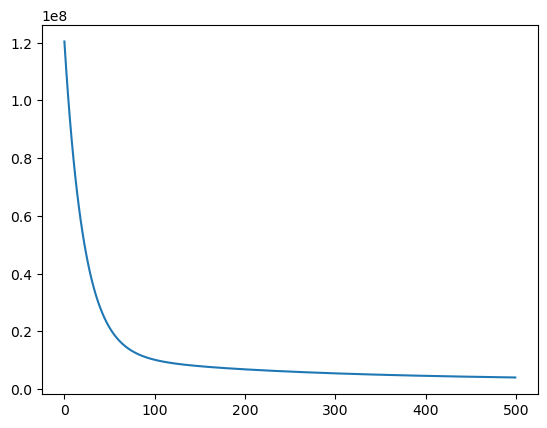

In [41]:
plt.plot(range(linearreg.n_iterations) , linearreg.costs , label = "cost vs epoch")
plt.show()

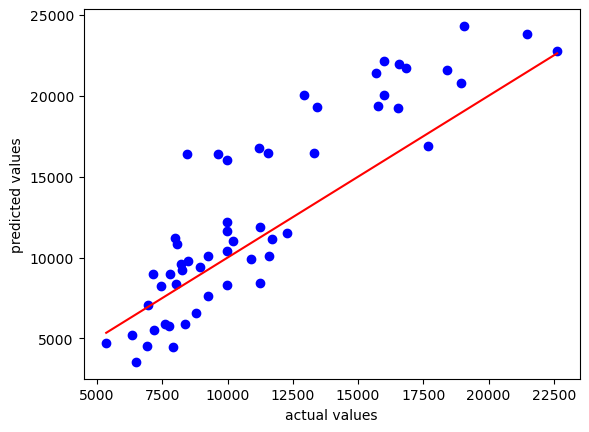

In [45]:
plt.scatter(Y_test, y_predicted, color='blue', label='Predicted vs Actual')
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Ideal Fit')

<Axes: >

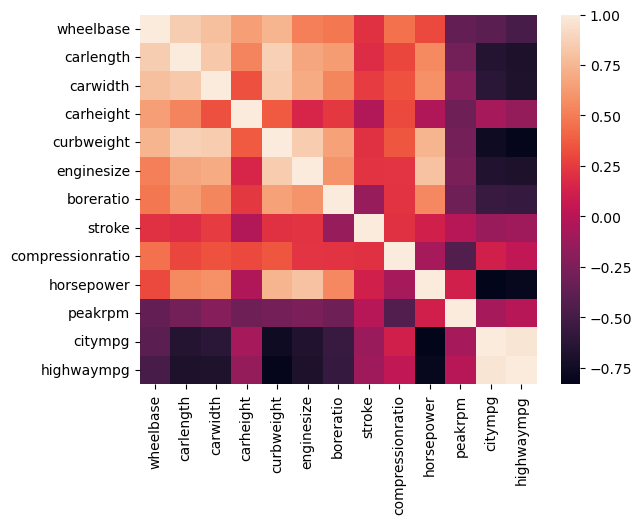

In [57]:
sns.heatmap(dfcorr)

In [113]:
#this is just practice

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Load the dataset
df = pd.read_csv('car_prices.csv')

# 2. Extract the car manufacturer from 'CarName'
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# 3. Drop unnecessary columns
df.drop(['CarName', 'car_ID'], axis=1, inplace=True)

# 4. One-Hot Encode Categorical Columns
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Identify numerical features
numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                  'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                  'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# 6. Analyze range of numerical features
ranges = df[numerical_cols].max() - df[numerical_cols].min()
print("Range of each feature:\n", ranges)

# 7. Define function to apply scaling and evaluate R²
def scale_and_evaluate(scaler, X_train, X_test, y_train, y_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and test using Linear Regression
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate R²
    return r2_score(y_test, y_pred)

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 8. Apply different scaling methods and evaluate R²
scalers = {
    'Min-Max Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler(),
    'Robust Scaler': RobustScaler()
}

best_scaler = None
best_r2 = float('-inf')
results = {}

for name, scaler in scalers.items():
    r2 = scale_and_evaluate(scaler, X_train, X_test, y_train, y_test)
    results[name] = r2
    print(f"{name} R² Score: {r2:.4f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_scaler = name

# 9. Print the best scaler
print(f"\nBest Scaling Method: {best_scaler} with R²: {best_r2:.4f}")


Range of each feature:
 wheelbase             34.3
carlength             67.0
carwidth              12.0
carheight             12.0
curbweight          2578.0
enginesize           265.0
boreratio              1.4
stroke                 2.1
compressionratio      16.0
horsepower           240.0
peakrpm             2450.0
citympg               36.0
highwaympg            38.0
dtype: float64
Min-Max Scaler R² Score: -70544348590989025214464.0000
Standard Scaler R² Score: 0.9342
Robust Scaler R² Score: 0.9342

Best Scaling Method: Standard Scaler with R²: 0.9342
